# **Wiktor Ciołek LSED lab8 14.06.2024**

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 18

import warnings
warnings.filterwarnings("ignore")

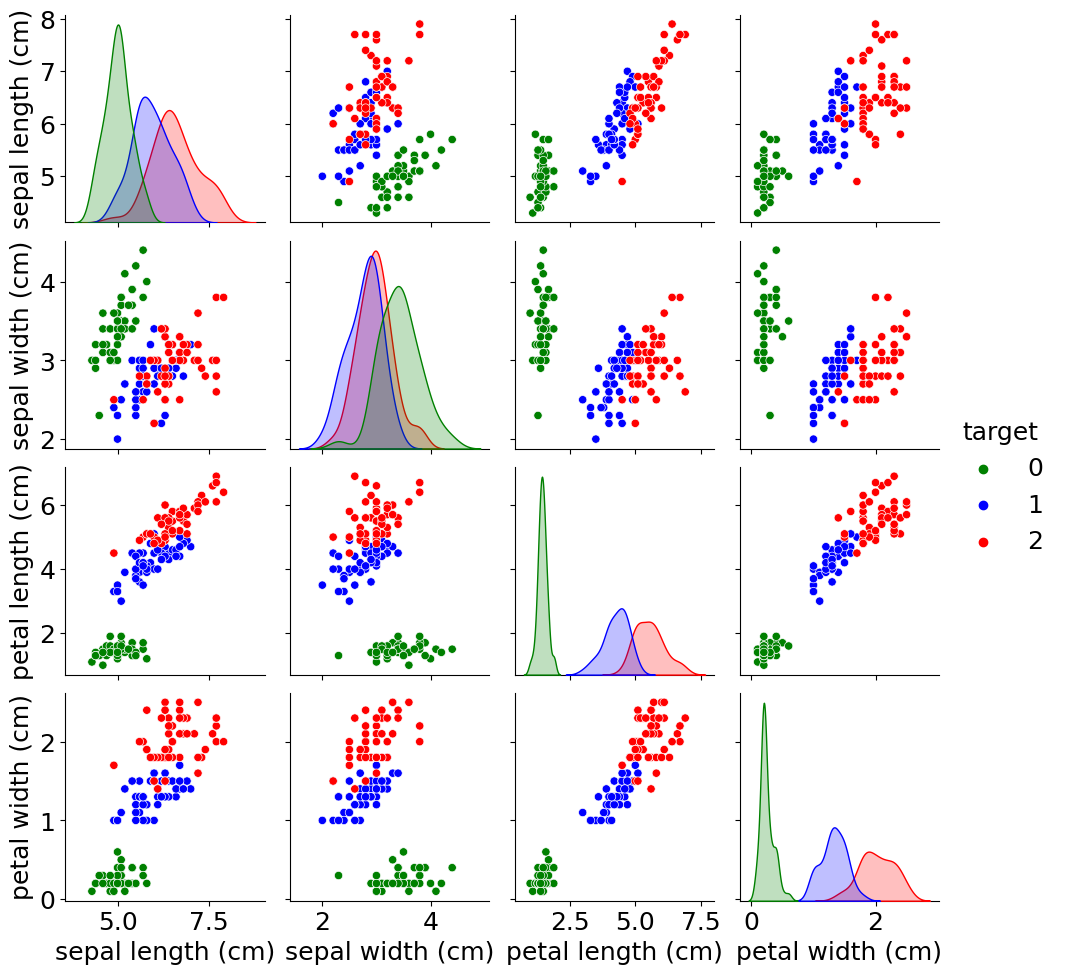

In [89]:
from sklearn.datasets import load_iris

data, target = load_iris(as_frame=True, return_X_y=True)
data['target'] = target

sns.pairplot(data, hue='target', palette=['green', 'blue', 'red'])
y = data.target
n_clusters = len(np.unique(y))

Column 0 - sepal length (cm)
Column 1 - sepal width (cm)
Column 2 - petal length (cm)
Column 3 - petal width (cm)


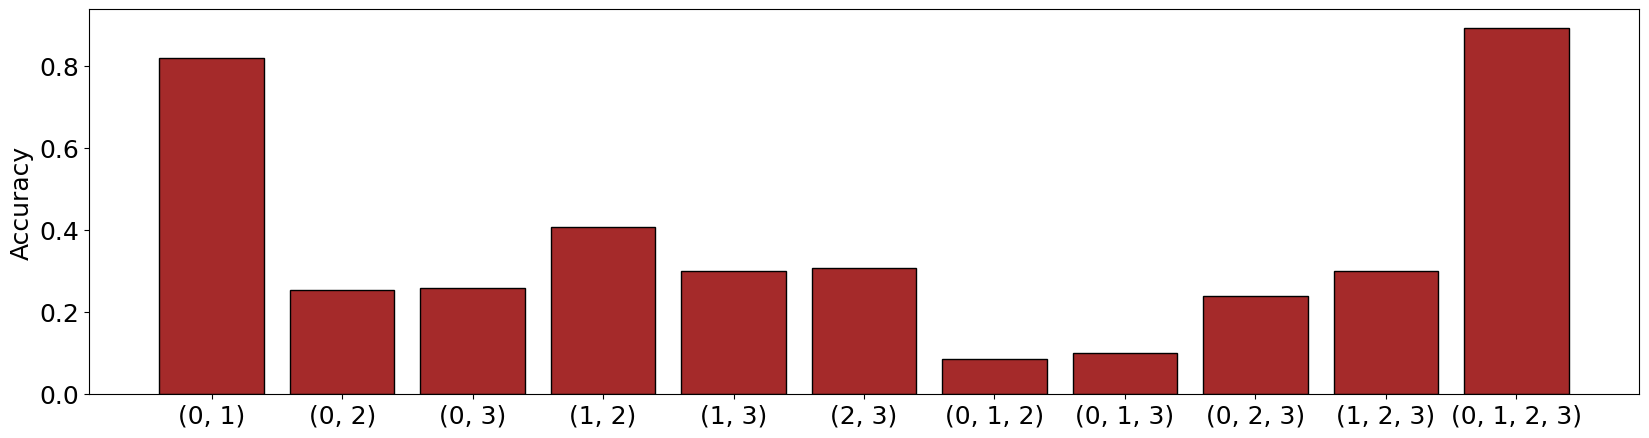

In [90]:
from itertools import combinations, chain
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# import os
# os.environ["OMP_NUM_THREADS"] = "5"
# print(os.environ.get("OMP_NUM_THREADS"))

combs = list(chain(*[(combinations(range(4), i)) for i in range(2, 5)]))

accs=[]
for comb in combs:
    X = data.iloc[:, list(comb)]
    km = KMeans(n_clusters = n_clusters, n_init=50)
    km.fit(X)
    accs.append(sum(y == km.labels_) / len(X))

plt.figure(figsize=(20, 5))
plt.bar([str(c) for c in combs], accs, edgecolor='k', color='brown')
plt.ylabel("Accuracy")
for i, col in enumerate(data.columns[:-1]):
    print(f"Column {i} - {col}")